# Pig paper describes a new bias measure lets test that


In [1]:
import numpy as np
import os
import csv
import gensim
from sklearn.externals import joblib
import torch.nn.functional as F
import torch.nn as nn
import torch
from gensim.test.utils import datapath, get_tmpfile
from gensim.models import KeyedVectors
from gensim.scripts.glove2word2vec import glove2word2vec
from Neighbour import get_neighbours
import sklearn
from sklearn.externals import joblib
import numpy as np
import json

In [2]:
# def get_neighbours(word, file):
#     n = joblib.load(file)
#     return list(n[word].keys())

# def nearest_words(word, number):
#     return get_neighbours(word, 'neighbours1440tsne.pkl')[-number:]

In [3]:
# words = ["he", "his", "He", "her", "she", "him", "She", "man", "women", "men", "His", "woman", "spokesman", "wife", "himself", "son", "mother", "father", "chairman", "daughter", "husband", "guy", "girls", "girl", "Her", "boy", "King", "boys", "brother", "Chairman", "spokeswoman", "female", "sister", "Women", "Man", "male", "herself", "Lions", "Lady", "brothers", "dad", "actress", "mom", "sons", "girlfriend", "Kings", "Men", "daughters", "Prince", "Queen", "teenager", "lady", "Bulls", "boyfriend", "sisters", "Colts", "mothers", "Sir", "king", "businessman", "Boys", "grandmother", "grandfather", "deer", "cousin", "Woman", "ladies", "Girls", "Father", "uncle", "PA", "Boy", "Councilman", "mum", "Brothers", "MA", "males", "Girl", "Mom", "Guy", "Queens", "congressman", "Dad", "Mother", "grandson", "twins", "bull", "queen", "businessmen", "wives", "widow", "nephew", "bride", "females", "aunt", "Congressman", "prostate_cancer", "lesbian", "chairwoman", "fathers", "Son", "moms", "Ladies", "maiden", "granddaughter", "younger_brother", "Princess", "Guys", "lads", "Ma", "Sons", "lion", "Bachelor", "gentleman", "fraternity", "bachelor", "niece", "Lion", "Sister", "bulls", "husbands", "prince", "colt", "salesman", "Bull", "Sisters", "hers", "dude", "Spokesman", "beard", "filly", "Actress", "Him", "princess", "Brother", "lesbians", "councilman", "actresses", "Viagra", "gentlemen", "stepfather", "Deer", "monks", "Beard", "Uncle", "ex_girlfriend", "lad", "sperm", "Daddy", "testosterone", "MAN", "Female", "nephews", "maid", "daddy", "mare", "fiance", "Wife", "fiancee", "kings", "dads", "waitress", "Male", "maternal", "heroine", "feminist", "Mama", "nieces", "girlfriends", "Councilwoman", "sir", "stud", "Mothers", "mistress", "lions", "estranged_wife", "womb", "Brotherhood", "Statesman", "grandma", "maternity", "estrogen", "ex_boyfriend", "widows", "gelding", "diva", "teenage_girls", "nuns", "Daughter", "czar", "ovarian_cancer", "HE", "Monk", "countrymen", "Grandma", "teenage_girl", "penis", "bloke", "nun", "Husband", "brides", "housewife", "spokesmen", "suitors", "menopause", "monastery", "patriarch", "Beau", "motherhood", "brethren", "stepmother", "Dude", "prostate", "Moms", "hostess", "twin_brother", "Colt", "schoolboy", "eldest", "brotherhood", "Godfather", "fillies", "stepson", "congresswoman", "Chairwoman", "Daughters", "uncles", "witch", "Mommy", "monk", "viagra", "paternity", "suitor", "chick", "Pa", "fianc\u00e9", "sorority", "macho", "Spokeswoman", "businesswoman", "eldest_son", "gal", "statesman", "schoolgirl", "fathered", "goddess", "hubby", "mares", "stepdaughter", "blokes", "dudes", "socialite", "strongman", "Witch", "fianc\u00e9e", "uterus", "grandsons", "Bride", "studs", "mama", "Aunt", "godfather", "hens", "hen", "mommy", "Babe", "estranged_husband", "Fathers", "elder_brother", "boyhood", "baritone", "Diva", "Lesbian", "grandmothers", "grandpa", "boyfriends", "feminism", "countryman", "stallion", "heiress", "queens", "Grandpa", "witches", "aunts", "semen", "fella", "granddaughters", "chap", "knight", "widower", "Maiden", "salesmen", "convent", "KING", "vagina", "beau", "babe", "HIS", "beards", "handyman", "twin_sister", "maids", "gals", "housewives", "Gentlemen", "horsemen", "Businessman", "obstetrics", "fatherhood", "beauty_queen", "councilwoman", "princes", "matriarch", "colts", "manly", "ma", "fraternities", "Spokesmen", "pa", "fellas", "Gentleman", "councilmen", "dowry", "barbershop", "Monks", "WOMAN", "fraternal", "ballerina", "manhood", "Dads", "heroines", "granny", "gynecologist", "princesses", "Goddess", "yo", "Granny", "knights", "eldest_daughter", "HER", "underage_girls", "masculinity", "Girlfriend", "bro", "Grandmother", "grandfathers", "crown_prince", "Restless", "paternal", "Queen_Mother", "Boyfriend", "womens", "Males", "SHE", "Countess", "stepchildren", "Belles", "bachelors", "matron", "momma", "Legs", "maidens", "goddesses", "landlady", "sisterhood", "Grandfather", "Fraternity", "Majesty", "Babes", "lass", "maternal_grandmother", "blondes", "ma'am", "Womens", "divorcee", "Momma", "fathering", "Effie", "Lad", "womanhood", "missus", "Sisterhood", "granddad", "Mens", "papa", "gf", "sis", "Husbands", "Hen", "womanizer", "gynecological", "stepsister", "Handsome", "Prince_Charming", "BOY", "stepdad", "teen_ager", "GIRL", "dame", "Sorority", "beauty_pageants", "raspy", "harem", "maternal_grandfather", "Hes", "deliveryman", "septuagenarian", "damsel", "paternal_grandmother", "paramour", "paternal_grandparents", "Nun", "DAD", "mothering", "shes", "HE_'S", "Nuns", "teenage_daughters", "auntie", "widowed_mother", "Girlfriends", "FATHER", "virile", "COUPLE", "grandmas", "Hubby", "nan", "vixen", "Joan_Crawford", "stepdaughters", "endometrial_cancer", "stepsons", "loins", "Grandson", "Mitchells", "erections", "Matron", "Fella", "daddies", "ter", "Sweetie", "Dudes", "Princesses", "Lads", "lioness", "Mamma", "virility", "bros", "womenfolk", "Heir", "BROTHERS", "manliness", "patriarchs", "earl", "sisterly", "Whore", "Gynaecology", "countess", "convents", "Oratory", "witch_doctor", "mamas", "yah", "aunty", "aunties", "Heiress", "lasses", "Breasts", "fairer_sex", "sorority_sisters", "WIFE", "Laurels", "penile", "nuh", "mah", "toms", "mam", "Granddad", "premenopausal_women", "Granddaddy", "nana", "coeds", "dames", "herdsman", "Mammy", "Fellas", "Niece", "menfolk", "Grandad", "bloods", "Gramps", "damsels", "Granddaughter", "mamma", "concubine", "Oros", "Blarney", "filial", "broads", "Ethel_Kennedy", "ACTRESS", "Tit", "fianc", "Hunk", "Night_Shift", "wifey", "Lothario", "Holy_Roman_Emperor", "horse_breeder", "grandnephew", "Lewises", "Muscular", "feminist_movement", "Sanan", "women\u00e2_\u20ac_\u2122", "Fiancee", "dowries", "Carmelite", "rah", "n_roller", "bay_filly", "belles", "Uncles", "PRINCESS", "womans", "Homeboy", "Blokes", "Charmer", "codger", "Delta_Zeta", "courtesans", "grandaughter", "SISTER", "Highness", "grandbabies", "crone", "Skip_Away", "noblewoman", "bf", "jane", "philandering_husband", "Sisqo", "mammy", "daugher", "director_Skip_Bertman", "DAUGHTER", "Royal_Highness", "mannish", "spinsters", "Missus", "madame", "Godfathers", "saleswomen", "beaus", "Risha", "luh", "sah", "negligee", "Women\u00e2_\u20ac_\u2122", "Hos", "salesgirl", "grandmom", "Grandmas", "Lawsons", "countrywomen", "Booby", "darlin", "Sheiks", "boyz", "wifes", "Bayi", "Il_Duce", "\u00e2_\u20ac_\u0153My", "fem", "daugther", "Potti", "hussy", "tch", "Gelding", "stemmed_roses", "Damson", "puh", "Tylers", "neice", "Mutha", "GRANDMOTHER", "youse", "spurned_lover", "mae", "Britt_Ekland", "clotheshorse", "Carlita_Kilpatrick", "Cambest", "Pretty_Polly", "banshees", "male_chauvinist", "Arliss", "mommas", "maidservant", "Gale_Harold", "Little_Bo_Peep", "Cleavers", "hags", "blowsy", "Queen_Elizabeth_I.", "lassies", "papas", "BABE", "ugly_ducklings", "Jims", "hellion", "Beautician", "coalminer", "relaxin", "El_Mahroug", "Victoria_Secret_Angel", "shepherdess", "Mosco", "Slacks", "nanna", "wifely", "tomboys", "LAH", "hast", "apo", "Kaplans", "milkmaid", "Robin_Munis", "John_Barleycorn", "royal_highness", "Meanie", "NAH", "trollop", "roh", "Jewess", "Sheik_Hamad", "mumsy", "Big_Pussy", "chil_dren", "Aunt_Bea", "basso", "sista", "girlies", "nun_Sister", "chica", "Bubbas", "massa", "Southern_belles", "Nephews", "castrations", "Mister_Ed", "Grandsons", "Calaf", "Malachy_McCourt", "Shamash", "hey_hey", "Harmen", "sonofabitch", "Donovans", "Grannie", "Kalinka", "hisself", "Devean", "goatherd", "hinds", "El_Corredor", "Kens", "notorious_womanizer", "goh", "Mommas", "washerwoman", "Samaira", "Coo_Coo", "Governess", "grandsire", "PRINCE_WILLIAM", "gramma", "him.He", "Coptic_priest", "Corbie", "Kennys", "thathe", "Pa_Pa", "Bristols", "Hotep", "snowy_haired", "El_Prado_Ire", "Girl_hitmaker", "Hurleys", "St._Meinrad", "sexually_perverted", "authoress", "Prudie", "raven_haired_beauty", "Bonos", "domestic_shorthair", "brothas", "nymphet", "Neelma", "Seita", "stud_muffin", "St._Judes", "yenta", "bare_shouldered", "Pinkney_Sr.", "PRINCE_CHARLES", "Bisutti", "sistas", "Blanche_Devereaux", "Momoa", "Quiff", "Scotswoman", "balaclava_clad_men", "Louis_Leakey", "dearie", "vacuum_cleaner_salesman", "grandads", "postulant", "SARAH_JESSICA_PARKER", "AUNT", "Prince_Dauntless", "Dalys", "Darkie", "Czar_Nicholas", "Lion_Hearted", "Boy_recliner", "baby_mamas", "giantess", "Lawd", "GRANNY", "fianc_e", "Bilqis", "WCTU", "famly", "Ellas", "feminazis", "Pentheus", "MAMAS", "Town_Criers", "Saggy", "youngman", "grandam", "divorc\u00e9", "bosomed", "roon", "Simmentals", "eponymous_heroine", "LEYLAND", "REE'", "cain't", "Evelynn", "WAH'", "sistah", "Horners", "Elsie_Poncher", "Coochie", "rat_terriers", "Limousins", "Buchinski", "Schicchi", "Carpitcher", "Khwezi", "HAH'", "Shazza", "Mackeson", "ROH'", "kuya", "novice_nun", "Shei", "Elmasri", "ladykiller", "6yo", "Yenta", "SHEL", "pater", "Souse", "Tahirah", "comedian_Rodney_Dangerfield", "Shottle", "carryin", "Sath", "fa'afafine", "royal_consort", "hus_band", "maternal_uncles", "dressing_provocatively", "dreamgirl", "millionaire_industrialist", "Georgie_Girl", "Must_Be_Obeyed", "joh", "Arabian_stallion", "ahr", "mso_para_margin_0in", "SOO'", "Biddles", "Chincoteague_Volunteer_Fire", "Lisa_Miceli", "gorgeous_brunette", "fianc\u017d", "Moved_fluently", "Afternoon_Deelites", "biker_dude", "Vito_Spatafore", "MICK_JAGGER", "Adesida", "Reineman", "witz", "Djamila", "Glenroe", "daddys", "Romanzi", "gentlewomen", "Dandie_Dinmont_terrier", "Excess_Ire", "By_SYVJ_Staff", "zan", "CONFESSIONS", "Magees", "wimmin", "tash", "Theatrical_Ire", "Prince_Charmings", "chocolate_eclair", "bron", "daughers", "Felly", "fiftyish", "Spritely", "GRANDPA", "distaffer", "Norbertines", "DAH'", "leader_Muammar_Gadaffi", "swains", "Prince_Tomohito", "Honneur", "Soeur", "jouster", "Pharaoh_Amenhotep_III", "QUEEN_ELIZABETH_II", "Ne'er", "Galileo_Ire", "Fools_Crow", "Lannisters", "Devines", "gonzales", "columnist_Ann_Landers", "Moseleys", "hiz", "busch", "roastee", "toyboys", "Sheffields", "grandaunt", "Galvins", "Giongo", "geh", "flame_haired_actress", "Grammarian", "Greg_Evigan", "frontierswoman", "Debele", "rabs", "nymphets", "aai", "BREE", "Shaqs", "ZAY", "pappa", "Housa", "refrigerator_repairman", "artificial_inseminations", "chickie", "Rippa", "teenager_Tracy_Turnblad", "homebred_colt", "Abigaille", "hen_pecked_husband", "businesman", "her.She", "Kaikeyi", "Stittsworth", "self_proclaimed_redneck", "Khella", "NeW", "Evers_Swindell", "Asmerom_Gebreselassie", "Boy_recliners", "Cliff_Claven", "Legge_Bourke", "Costos", "d'_honneur", "sistahs", "Cabble", "sahn", "CROW_AGENCY_Mont", "jezebel", "Harrolds", "ROSARIO_DAWSON", "INXS_frontman_Michael_Hutchence", "Gursikh", "Dadas", "VIAGA", "keen_horsewoman", "Theodoric", "Eldery", "lihn", "Alice_Kramden", "Santarina", "radical_cleric_al_Sadr", "Curleys", "SY'", "Fidaa", "Saptapadi", "Actor_Sean_Astin", "Kellita_Smith", "Doly", "Libertina", "Money_McBags", "Chief_Bearhart", "choirgirl", "chestnut_stallion", "VIGRA", "BY_JIM_McCONNELL", "Sal_Vitale", "Trivia_buffs", "kumaris", "fraternal_lodge", "galpals", "Borino_Quinn", "lina", "LATEST_Rapper", "Bezar", "Manro", "bakla", "Grisetti", "blond_bimbo", "spinster_aunt", "gurls", "hiswife", "paleface", "Charlye", "hippie_chicks", "Khalifas", "Picture_JUSTIN_SANSON", "Hepburns", "yez", "ALDER", "Sanussi", "Lil_Sis", "McLoughlins", "Barbra_Jean", "Lulua", "thatshe", "actress_Shohreh_Aghdashloo", "SIR_ANTHONY_HOPKINS", "Gloddy", "ZAH'", "ORANGE_'S", "Danielle_Bimber", "grandmum", "Kulkis", "Brazington", "Marisa_Lenhard_CFA", "SIR_JOHN", "Clareman", "Aqila", "Heavily_tattooed", "Libbys", "thim", "elocutionist", "submissives", "Inja", "rahm", "Agnes_Gooch", "fake_tits", "nancy_boys", "Swaidan", "SHAH'", "ain'ta_bed", "Shumail_Raj", "Duchesse", "diethylstilbestrol_DES", "colt_foal", "unfaithful_lover", "Maseri", "nevah", "SAHN", "Barths", "Toughkenamon", "GUEST_STARS", "him.But", "Donna_Claspell", "gingham_dresses", "Massage_Parlour", "wae", "Wasacz", "Magistra", "vihl", "Smriti_Iraani", "boyish_haircut", "workingwoman", "borthers", "Capuchin_friars", "Nejma", "yes_sirs", "bivocational_pastor", "Grafters", "HOPWOOD", "Nicknamed_Godzilla", "yos", "Berkenfield", "Missis", "sitcom_Designing_Women", "Kafoa", "trainer_Emma_Lavelle", "sadomasochistic_dungeon", "iht", "desperates", "predessor", "wolf_cub", "indigenous_Peruvians", "Livia_Soprano", "troh", "colt_sired", "BOND_HILL", "ihl", "Drydens", "rahs", "Piserchia", "Sonny_Corinthos", "bankrobber", "Fwank", "feisty_redhead", "booze_guzzling", "COOPERS", "actress_Q'orianka_Kilcher", "Cortezar", "twe", "Jacoub", "Cindy_Iannarelli", "Hell_Raiser", "Fondly_referred", "Bridal_Shoppe", "Noleta", "Christinas", "IAGRA", "LaTanya_Richardson", "Sang_Bender", "Assasins", "sorrel_gelding", "septugenarian", "Hissy", "Muqtada_al_Sadr_mook", "Pfeni", "MADRID_AFX_Banco_Santander", "tuchis", "LeVaughn", "Gadzicki", "transvestite_hooker", "Fame_jockey_Laffit", "nun_Sister_Mary", "SAMSONOV", "Mayflower_Madam", "Shaque", "well.He", "Trainer_Julio_Canani", "sorrel_mare", "minivehicle_joint_venture", "wife_Dwina", "Aasiya_AH'_see", "Baratheon", "Rick_O'Shay", "Mammies", "goatie", "Nell_Gwynne", "charmingly_awkward", "Slamma", "DEHL", "Lorenzo_Borghese", "ALMA_Wis.", "Anne_Scurria", "father_Peruvians_alternately", "JULIE_ANDREWS", "Slim_Pickins", "Victoria_Secret_stunner", "BY'", "Sanam_Devdas", "pronounced_luh", "Pasha_Selim", "\u4e2d\u534e", "rson", "maternal_grandmothers", "IOWA_CITY_Ia", "Madame_de_Tourvel", "JAY'", "Sheika_Mozah_bint_Nasser", "Hotsy_Totsy", "D'_Ginto", "singer_Johnny_Paycheck", "uterine_prolapse_surgery", "SCOTTDALE_Pa.", "AdelaideNow_reports", "Marcus_Schenkenberg", "Clyse", "Obiter_Dicta", "comic_Sam_Kinison", "bitties", "ROCKVILLE_Ind.", "swimsuit_calendars", "Decicio_Smith", "Ma_ma", "Rie_Miyazawa", "celibate_chastity", "gwah", "ZAY'", "HER_Majesty", "Defrere", "Las_Madrinas", "\u7c3f_\u8042_\u7ffb", "Bea_Hamill", "ARCADIA_Calif._Trainer", "Bold_Badgett", "stakes_victress", "Hoppin_Frog", "Narumiya", "Flayfil", "hardman_Vinnie_Jones", "Marilyn_Monroe_lookalike", "Kivanc_Tatlitug", "Persis_Khambatta", "SINKING_SPRING_Pa.", "len_3rd", "DEAR_TRYING", "Farndon_Cheshire", "Krishna_Madiga", "daughter_Princess_Chulabhorn", "Marshall_Rooster_Cogburn", "Kitty_Kiernan", "Yokich", "Jarou", "Serdaris", "ee_ay", "Montifiore", "Chuderewicz", "Samuel_Le_Bihan", "filly_Proud_Spell", "Umm_Hiba", "pronounced_koo", "Sandy_Fonzo", "KOR'", "Fielder_Civil_kisses", "Federalsburg_Maryland", "Nikah_ceremony", "Brinke_Stevens", "Yakama_Tribal_Council", "Capuchin_Father", "wife_Callista_Bisek", "Beau_Dare", "Bedoni", "Arjun_Punj", "JOHNNY_KNOXVILLE", "cap_tain", "Alderwood_Boys", "Chi_Eta_Phi", "ringleader_Charles_Graner", "Savoies", "Lalla_Salma", "Mrs._Potiphar", "fahn", "name_Taylor_Sumers", "Vernita_Green", "Bollywood_baddie", "BENBROOK_Texas", "Assemblyman_Lou_Papan", "virgin_brides", "Cho_Eun", "CATHY_Freeman", "Uncle_Saul", "Lao_Brewery", "Ibo_tribe", "ruf", "rival_Edurne_Pasaban", "Hei_Shangri_La", "Mommy_dearest", "interest_Angola_Sonogal", "Ger_Monsun", "PUSSYCAT_DOLL", "Crown_Jewels_Condoms", "Lord_Marke", "Patootie", "Nora_Bey", "huntin_shootin", "Minister_Raymond_Tshibanda", "La_Nina_la_NEEN", "signature_Whoppers", "estranged_hubby_Kevin_Federline", "UR'", "pill_poppin", "GEHR'", "purebred_Arabians", "husbandly_duties", "VIAGRA_TIMING", "Hereford_heifer", "hushed_monotone_voice", "Pola_Uddin", "Wee_Jimmy_Krankie", "Kwakwanso", "Our_Galvinator", "shoh", "Codependency_Anonymous_Group", "LA'", "Taufa'ahau", "Invincible_Spirit_colt", "SAH'_dur", "MOUNT_CARMEL_Pa.", "watches_attentively", "SNL_spinoffs", "Seth_Nitschke", "Duns_Berwickshire", "defendant_Colleen_LaRose", "Silky_O'Sullivan", "Highcliff_Farm", "REN'", "Comestar", "Satisfied_Frog", "Jai_Maharashtra", "ATTICA_Ind.", "lover_Larry_Birkhead", "Tami_Megal", "chauvinist_pigs", "Phi_sorority", "Micronesian_immigrant", "Lia_Boldt", "Sugar_Tits", "actress_Kathy_Najimy", "zhoo", "Colombo_underboss", "Katsav_accusers", "Bess_Houdini", "rap_mogul_Diddy", "companions_Khin_Khin", "Van_Het", "Mastoi_tribe", "VITALY", "ROLLING_STONES_rocker", "womanizing_cad", "LILY_COLE", "paternal_grandfathers", "Lt._Col._Kurt_Kosmatka", "Kasseem_Jr.", "Ji_Ji", "Wilburforce", "VIAGRA_DOSE", "English_Sheepdogs", "pronounced_Kah", "Htet_Htet_Oo", "Brisk_Breeze", "Eau_du", "BY_MELANIE_EVANS", "Neovasc_Medical", "British_funnyman_RICKY", "4YO_mare", "Hemaida", "MONKTON", "Mrs_Mujuru", "BaGhana_BaGhana", "Shaaban_Abdel_Rahim", "Edward_Jazlowiecki_lawyer", "Ajman_Stud", "manly_pharaoh_even", "Serra_Madeira_Islands", "FRAY'", "panto_dames", "Khin_Myo", "dancer_Karima_El_Mahroug", "CROWN_Princess", "Baseball_HOFer", "Hasta_la_Pasta", "GIRLS_NEXT_DOOR", "Benedict_Groeschel", "Bousamra", "Ruby_Rubacuori_Ruby", "Monde_Bleu", "Un_homme_qui", "Taylor_Sumers", "Rapper_EMINEM", "Joe_Menchetti", "VAY'", "supermodel_NAOMI_CAMPBELL", "Supermodel_GISELE_BUNDCHEN", "Au_Lait", "Radar_Installed", "THOMAS_TOWNSHIP_Mich.", "Rafinesque", "Herman_Weinrich", "Abraxas_Antelope", "raspy_voiced_rocker", "Manurewa_Cosmopolitan_Club", "Paraone", "THE_LEOPARD", "Boy_Incorporated_LZB", "Dansili_filly", "Lumpy_Rutherford", "unwedded_bliss", "Bhavna_Sharma", "Scarvagh", "en_flagrante", "Mottu_Maid", "Dowager_Queen", "NEEN", "model_Monika_Zsibrita", "ROSIE_PEREZ", "Mattock_Ranger", "Valorous", "Surpreme", "Marwari_businessmen", "Grandparents_aunts", "Kimberley_Vlaeminck", "Lyn_Treece_Boys", "PDX_Update", "Virsa_Punjab", "eyelash_fluttering", "Pi_fraternity", "HUNTLEIGH_Mo.", "novelist_Jilly_Cooper", "Naha_Shuri_temple", "Yasmine_Al_Massri", "Mu_Gamma_Xi", "Mica_Ertegun", "Ocleppo", "VIAGRA_CONTRAINDICATIONS", "daughter_PEACHES", "trainer_Geoff_Wragg", "OVERNIGHT_DELIVERY", "Fitts_retiree", "de_Tourvel", "Lil_Lad", "north_easterner", "Aol_Weird_News", "Somewhat_improbably", "Sikh_panth", "Worcester_2m_7f", "Zainab_Jah", "OLYMPIC_medalist", "Enoch_Petrucelly", "collie_Lassie", "LOW'", "clumsiness_Holloway", "ayr", "OHR'", "ROLLING_STONES_guitarist", "LAH'_nee", "Ian_Beefy_Botham", "Awapuni_trainer", "Glamorous_Granny", "Chiang_Ching", "MidAtlantic_Cardiovascular_Associates", "Yeke", "Seaforth_Huron_Expositor", "Westley_Cary_Elwes", "Cate_Blanchett_Veronica_Guerin", "Bellas_Gate", "witch_Glinda", "wives_mistresses", "Woodsville_Walmart", "2YO_colt", "Manav_Sushant_Singh", "Pupi_Avati_Il", "Sigma_Beta_Rho", "Bishop_Christopher_Senyonjo", "Vodou_priest", "Rubel_Chowdhury", "Claddagh_Ring", "TAH'_duh_al", "al_Sadr_mook_TAH'", "ROBIN_GIBB", "GAHN'", "BY_THOMAS_RANSON", "sister_Carine_Jena", "Lyphard_mare", "summa_cum", "Semenya_grandmother_Maputhi", "Clare_Nuns", "Talac", "sex_hormones_androgens", "majeste", "Saint_Ballado_mare", "Carrie_Huchel", "Mae_Dok", "wife_Dieula", "Earnest_Sirls", "spoof_bar_mitzvah", "von_Boetticher", "Audwin_Mosby", "Case_presentationWe", "Vincent_Papandrea", "KRAY'", "Sergi_Benavent", "Le_Poisson", "Von_Cramm", "Patti_Mell", "Raymi_Coya", "Benjamin_BeBe_Winans", "Nana_Akosua", "Auld_Acquaintance", "Desire_Burunga", "Company_Wrangler_Nestea", "ask_Krisy_Plourde", "JUANITA_BYNUM", "livia", "GAMB", "Gail_Rosario_Dawson", "Ramgarhia_Sikh", "Catholic_nun_Sister", "FOUR_WEDDINGS_AND", "Robyn_Scherer", "brother_King_Athelstan", "Santo_Loquasto_Fences", "Wee_Frees", "MARISOL", "Soliloquy_Stakes", "Whatever_Spoetzl", "Marc'Aurelio", "mon_petit", "Sabbar_al_Mashhadani", "KAY'_lee", "m_zah_MAH'", "BY_TAMI_ALTHOFF", "hobbit_Samwise_Gamgee", "Bahiya_Hariri_sister", "daddy_Larry_Birkhead", "Sow_Tracey_Ullman", "coach_Viljo_Nousiainen", "Carmen_Lebbos", "conjoined_twins_Zainab", "Rob_Komosa", "ample_bosomed", "Ageing_rocker", "psychic_Oda"]

In [4]:
# biased_nhood = {}
# for word in words:
#     if word == 'Homeboy':
#         print(word)
#     try:
#         word_neighbours = nearest_words(word, 1000)
#         bias_count = 0
#         for nb in word_neighbours:
#             if nb in words:
#                 if word == 'Homeboy':
#                     print(nb, len(word_neighbours))
#                 bias_count += 1
#         biased_nhood[word] = bias_count / len(word_neighbours)            
#     except:
#         continue

In [12]:
with open('professions.json', 'r') as handle:
    gender_words = json.load(handle)    

In [13]:
word_list = list(tuple([i[0].lower() for i in gender_words]))

# Fuck neighbours are wrong

In [14]:
len(word_list)

320

In [29]:
# VECTORS = joblib.load('embeddings_glove_large.pkl')

In [15]:
def cosine_similarity(x, y):
    if type(x) is str:
        x = VECTORS[x]
    if type(y) is str:
        y = VECTORS[y]
    cos = np.dot(x, y) / (np.linalg.norm(x)*np.linalg.norm(y))
    return cos

def get_neighbours(word_list, max_neighbours):
    word_dict = {}
    for word in word_list:
        neighbour_dict = dict(zip([str(i) for i in range(max_neighbours)], np.random.randint(-101,-100, size=(max_neighbours,))))
        try:
            v1 = VECTORS[word]
        except:
            continue
        min_val = -100000
        for key in VECTORS:
            if key.lower() == word: continue
            cs = cosine_similarity(v1, VECTORS[key])
            if cs > min_val:
                goner = min(neighbour_dict, key=neighbour_dict.get)
                neighbour_dict[key] = neighbour_dict.pop(goner)
                neighbour_dict[key] = cs
                min_val = min(neighbour_dict.values())
        word_dict[word] = dict(sorted(neighbour_dict.items(), key=lambda neighbour_dict: neighbour_dict[1]))
        if len(word_dict[word]) < max_neighbours:
            print(word, word_dict[word])
        print(f"{word} done | len: {len(word_dict[word])}")
    return word_dict

In [ ]:
nnn = get_neighbours(word_list, 1000)

In [ ]:
nnn

In [83]:
# joblib.dump(nnn, 'original_neighbours.pkl') 

['original_neighbours.pkl']

# Fix embeddings

In [21]:
def get_neighbours(word, number, bad_word_list, file, isfile=False):
    if isfile:
        n = joblib.load(file)
    else:
        n = file
        wds = []
    for l in list(n[word].keys()):
        if l in bad_word_list:
            continue
        wds.append(l)    
    return wds[-number:]

def cosine_similarity(X, male_vectors):
    return torch.matmul(male_vectors, X) /  (male_vectors.norm(dim=1) * X.norm(dim=0))

def objective(X, old_vec, near_vec, male_vectors, female_vectors, r):
    male_similarity = cosine_similarity(X, male_vectors)
    female_similarity = cosine_similarity(X, female_vectors)
    G = torch.abs(male_similarity - female_similarity).mean(dim=0)
    new_vec_localization = cosine_similarity(X, near_vec)
    old_vec_localization = cosine_similarity(old_vec, near_vec)
    M = torch.abs(new_vec_localization - old_vec_localization).mean(dim=0)
#     J = G + M
    J = r * G + (1 - r) * M #Do later #Later is now
    return J

def get_X(nfeatures=1, datapoints=300, low=-1, high=1):
    return torch.FloatTensor(np.random.uniform(low, high, size=(datapoints)))

class myModel(nn.Module):
    def __init__(self, X, old_vec, near_vec, male_vectors, female_vectors, r):
        super(myModel, self).__init__()
        self.old_vec = old_vec
        self.near_vec = near_vec
        self.male_vectors = male_vectors
        self.female_vectors = female_vectors
        self.X = nn.Parameter(X)
        self.r = r
        
    def forward(self):
        return  objective(self.X, self.old_vec, self.near_vec, self.male_vectors, self.female_vectors, self.r)
    
def minimize(lr, max_epochs, X, old_vec, near_vec, male_vectors, female_vectors, r, verbose=False):
    m = myModel(X, old_vec, near_vec, male_vectors, female_vectors, r)
    optimizer = torch.optim.Adam(m.parameters(), lr=lr)
    for epoch in range(max_epochs):
            optimizer.zero_grad()
            out = m.forward()
            out.backward()
            optimizer.step()
            if verbose:
                print(f"Epoch: {epoch} | objective: {out}")
    return m.X        

def get_new_word_embs(word, VECTORS, n, r, bad_word_list, file, verbose=False):
    lr = 1e-1
    max_epochs = int(1e3)
    old_vec = torch.FloatTensor(VECTORS[word]).requires_grad_(True)
    X = get_X().requires_grad_(True)
    original_X = X.detach().clone()
    near_vec = torch.FloatTensor([VECTORS[l] for l in get_neighbours(word, n, bad_word_list, file)]).requires_grad_(True)
    male_vectors = torch.FloatTensor([VECTORS[word] for word in  ['male', 'man', 'he', 'husband', 'boy']]).requires_grad_(True)
    female_vectors = torch.FloatTensor([VECTORS[word] for word in ['female', 'woman', 'she', 'wife', 'girl']]).requires_grad_(True)
    updatedX = minimize(lr, max_epochs, X, old_vec, near_vec, male_vectors, female_vectors, r, verbose)
    return updatedX

def make_new_embeddings(wordlist, VECTOR, n, r, bad_word_list, file):
    emb_list = ''
    for word in wordlist:
        try:
            emb = get_new_word_embs(word, VECTOR, n, r, bad_word_list, file)
            emb = word + ' ' + ' '.join([str(i) for i in emb.detach().numpy()])
            emb_list += emb + '\n'
        except Exception as e:
            print(e)
            print(f"failed for {word}")
            continue
    return emb_list        

In [17]:
nnn = joblib.load('original_neighbours.pkl') 

In [ ]:
g = make_new_embeddings(word_list, VECTORS, 200, 0.6, word_list, nnn)

In [24]:
# joblib.dump(new_embs, 'embedding_for_new_words_200_06.pkl') 

['embedding_for_new_words_200_06.pkl']

# Find neighbours for embeddings

In [26]:
def cosine_similarity(x, y):
    try:
        return np.dot(x, y) / (np.linalg.norm(x)*np.linalg.norm(y))
    except:
        print(x, y)

def fetch(word, VECTOR, embs):
    if word in embs.keys():
        return embs[word]
    return VECTOR[word]
     

def get_neighbours(word_list, max_neighbours, embs, VECTORS):
    word_dict = {}
    for word in word_list:
        neighbour_dict = dict(zip([str(i) for i in range(max_neighbours)], np.random.randint(-101,-100, size=(max_neighbours,))))
        try:
            v1 = fetch(word, VECTORS, embs)
        except:
            continue
        min_val = -100000
        for key in VECTORS:
            if key.lower() == word: continue
            cs = cosine_similarity(v1, fetch(key, VECTORS, embs))
            if cs > min_val:
                goner = min(neighbour_dict, key=neighbour_dict.get)
                neighbour_dict[key] = neighbour_dict.pop(goner)
                neighbour_dict[key] = cs
                min_val = min(neighbour_dict.values())
        word_dict[word] = dict(sorted(neighbour_dict.items(), key=lambda neighbour_dict: neighbour_dict[1]))
        if len(word_dict[word]) < max_neighbours:
            print(word, word_dict[word])
        print(f"{word} done | len: {len(word_dict[word])}")
    return word_dict

In [9]:
VECTORS = joblib.load('embeddings_glove_large.pkl')

In [27]:
def loadGloveModel(f):
    model = {}
    for line in f.split('\n')[:-1]:
        splitLine = line.split()
        word_end_index = len(splitLine) - 300 
        word = ' '.join(splitLine[0:word_end_index])
        embedding = np.array([float(val) for val in splitLine[-300:]])
        model[word] = embedding
    print("Done.",len(model)," words loaded!")
    return model

new_embs = joblib.load('embedding_for_new_words_200_06.pkl') 
nnew_embs = loadGloveModel(new_embs)

Done. 291  words loaded!


In [ ]:
embs_new_neighbours = get_neighbours(word_list, 1000, nnew_embs, VECTORS)

In [30]:
joblib.dump(embs_new_neighbours, 'embs_new_neighbours_200_06.pkl')

['embs_new_neighbours_200_06.pkl']

# Percent neighbour metric

In [31]:
import matplotlib.pyplot as plt

In [32]:
with open('professions.json') as handle:
    datajson = json.load(handle)

In [33]:
def get_male_nei(word, nnn, malewords):
    count = 0
    for n in nnn[word]:
        if n in malewords:
            count += 1
    return count       

In [34]:
def plot_(nnn):
    allwords, femalewords, malewords = [], [], []
    with open('professions.json') as handle:
        datajson = json.load(handle)
    for element in datajson:
        word = element[0]
        allwords.append(word)
        if element[1] + element[2] > 0:
            malewords.append(word)
        else:   
            femalewords.append(word)        
    X, Y, wrds = [], [], []
    for element in datajson:
        try:    
            word = element[0]
            Y.append(get_male_nei(word, nnn, malewords))
            x = cosine_similarity(VECTORS[word], VECTORS['him']) - cosine_similarity(VECTORS[word], VECTORS['her'])
            X.append(x)
            wrds.append(word)
        except:
            continue
    plt.figure(figsize=(12,6))
    plt.scatter(X, Y, s=5)
    to_plot = "nurse dancer receptionist housekeeper nanny archaeologist magician dentist musician comic coach warden colonel farm inventor commander".split()
    for i, (label, x, y) in enumerate(zip(wrds, X, Y)):
        if label in to_plot or x < -0.2:
            plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points')
                

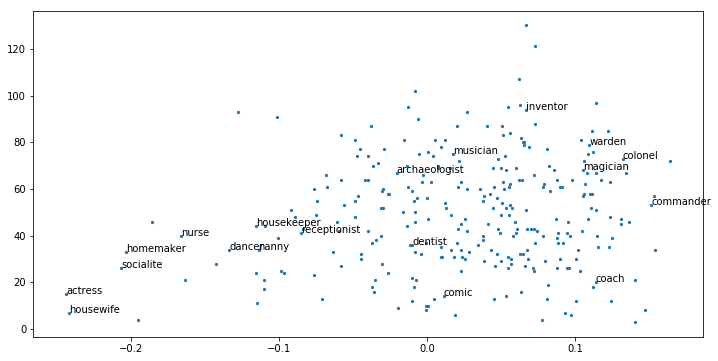

In [35]:
plot_(nnn)

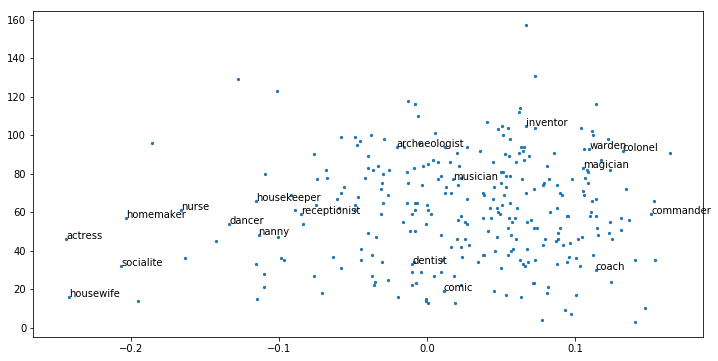

In [36]:
plot_(embs_new_neighbours)